In [1]:
#import dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
#clean data
wine_dataframe=pd.read_csv("Resources/wine_dataset.csv")
wine_dataframe_clean=wine_dataframe.drop(["Unnamed: 0","region_2", "description"], axis=1)
wine_dataframe_clean

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La BÃ©gude, named af...",La BrÃ»lade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",CuvÃ©e Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut RosÃ©,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


In [3]:
clean_wine_data=wine_dataframe_clean.dropna()
clean_wine_data

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La BÃ©gude, named af...",La BrÃ»lade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...,...
150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,France,"Offers an intriguing nose with ginger, lime an...",CuvÃ©e Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora


<IPython.core.display.Javascript object>


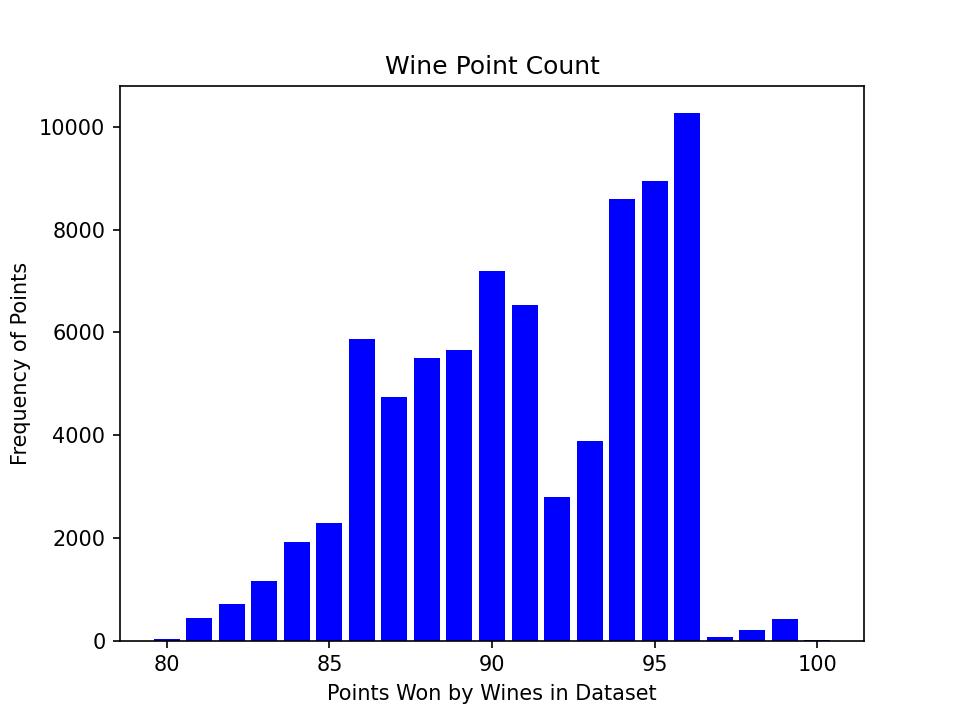

Text(0, 0.5, 'Frequency of Points')

In [28]:
#count breakdown
points_count=clean_wine_data["points"].value_counts().tolist()
points_labels=clean_wine_data["points"].unique()
points_labels
points_count

#chart for point breakdown
plt.bar(points_labels,points_count, color='b')

plt.title("Wine Point Count")
plt.xlabel("Points Won by Wines in Dataset")
plt.ylabel("Frequency of Points")

In [29]:
variety_count=clean_wine_data["variety"].value_counts().tolist()
variety_labels=clean_wine_data["variety"].unique()
variety_num=len(variety_labels)
variety_num


427

In [30]:
winery_count=clean_wine_data["winery"].value_counts().tolist()
winery_labels=clean_wine_data["winery"].unique()
number_winery=len(winery_labels)
number_winery


8652

In [9]:
country_count=clean_wine_data["country"].value_counts()
country_labels=clean_wine_data["country"].unique()

#variety chart
# plt.bar(country_labels,country_count, color='b')
# plt.title("Country Count for Wine in Dataset")
# plt.xlabel("Countries the Wines are from")
# plt.ylabel("Country Frequency")


In [ ]:
#sort by country and then point break down and determine the percentage of wines that score well for each of the countries
usa_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="US")]
point_breakdown_usa=usa_country_count["points"].value_counts().tolist()
point_breakdown_usa_labels=usa_country_count["points"].unique()
point_breakdown_usa_labels

plt.bar(point_breakdown_usa_labels,point_breakdown_usa, color='b')
plt.title("USA Count for Wine in Dataset")
plt.xlabel("Countries the Wines are from")
plt.ylabel("Country Frequency")

In [ ]:
spain_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Spain")]
point_breakdown_spain=spain_country_count["points"].value_counts().tolist()
point_breakdown_spain_labels=spain_country_count["points"].unique()
point_breakdown_usa_labels

# plt.bar(point_breakdown_spain_labels,point_breakdown_spain, color='r')
# plt.title("Spain Count for Wine in Dataset")
# plt.xlabel("Points from Spain")
# plt.ylabel("Point Frequency Spain")


In [ ]:
france_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="France")]
point_breakdown_france=france_country_count["points"].value_counts().tolist()
point_breakdown_france_labels=france_country_count["points"].unique()


# plt.bar(point_breakdown_france_labels,point_breakdown_france, color='y')
# plt.title("France Count for Wine in Dataset")
# plt.xlabel("Points from France")
# plt.ylabel("Point Frequency France")

In [ ]:
italy_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Italy")]
point_breakdown_italy=italy_country_count["points"].value_counts().tolist()
point_breakdown_italy_labels=italy_country_count["points"].unique()


# plt.bar(point_breakdown_italy_labels,point_breakdown_italy, color='g')
# plt.title("Italy Count for Wine in Dataset")
# plt.xlabel("Points from Italy")
# plt.ylabel("Point Frequency Italy")

In [ ]:
argentina_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")]
point_breakdown_argentina=argentina_country_count["points"].value_counts()
point_breakdown_argentina_labels=argentina_country_count["points"].unique()


# plt.bar(point_breakdown_argentina_labels,point_breakdown_argentina, color='c')
# plt.title("Argentina Count for Wine in Dataset")
# plt.xlabel("Points from Argentina")
# plt.ylabel("Point Frequency Argentina")

In [ ]:
#problem with canada doesnt makes sense the point breakdown 
canada_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Canada")]
point_breakdown_canada=canada_country_count["points"].value_counts().tolist()
point_breakdown_canada

# plt.bar(point_breakdown_argentina_labels,point_breakdown_argentina, color='c')
# plt.title("Argentina Count for Wine in Dataset")
# plt.xlabel("Points from Argentina")
# plt.ylabel("Point Frequency Argentina")


In [ ]:
australia_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Australia")]
point_breakdown_australia=australia_country_count["points"].value_counts().tolist()
point_breakdown_australia

# plt.bar(point_breakdown_argentina_labels,point_breakdown_argentina, color='c')
# plt.title("Argentina Count for Wine in Dataset")
# plt.xlabel("Points from Argentina")
# plt.ylabel("Point Frequency Argentina")


In [4]:
summary_stat_points=clean_wine_data["points"].describe()
summary_stat_points

count    77284.000000
mean        88.231678
std          3.303169
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [16]:
filter_df=clean_wine_data.loc[(clean_wine_data["points"]>=93) & (clean_wine_data["points"]<=96)]
country_filter=filter_df["country"].value_counts()
country_filter
# summary=filter_df.groupby(["points"])

US           4736
France       1258
Italy        1156
Spain         269
Australia     227
Argentina     114
Canada          3
Name: country, dtype: int64

In [27]:
count_us=len(clean_wine_data.loc[(clean_wine_data["country"]=="US")])
count_italy=len(clean_wine_data.loc[(clean_wine_data["country"]=="Italy")])
count_spain=len(clean_wine_data.loc[(clean_wine_data["country"]=="Spain")])
count_france=len(clean_wine_data.loc[(clean_wine_data["country"]=="France")])
count_argentina=len(clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")])
count_canada=len(clean_wine_data.loc[(clean_wine_data["country"]=="Canada")])
count_australia=len(clean_wine_data.loc[(clean_wine_data["country"]=="Australia")])


In [26]:
count_us_filter=len(filter_df.loc[(filter_df["country"]=="US")])
count_italy_filter=len(filter_df.loc[(filter_df["country"]=="Italy")])
count_spain_filter=len(filter_df.loc[(filter_df["country"]=="Spain")])
count_france_filter=len(filter_df.loc[(filter_df["country"]=="France")])
count_argentina_filter=len(filter_df.loc[(filter_df["country"]=="Argentina")])
count_canada_filter=len(filter_df.loc[(filter_df["country"]=="Canada")])
count_australia_filter=len(filter_df.loc[(filter_df["country"]=="Australia")])


In [ ]:
#percent of wines from the countries that scored between 93 and 96

In [19]:
usa_percent=(count_us_filter/count_us)*100
usa_percent

11.821971493472455

In [20]:
italy_percent=(count_italy_filter/count_italy)*100
italy_percent

8.612725376247951

In [21]:
spain_percent=(count_spain_filter/count_spain)*100
spain_percent

4.166021372154251

In [22]:
france_percent=(count_france_filter/count_france)*100
france_percent

12.586293146573288

In [23]:
argentina_percent=(count_argentina_filter/count_argentina)*100
argentina_percent

2.9238266222108233

In [24]:
canada_percent=(count_canada_filter/count_canada)*100
canada_percent

2.097902097902098

In [25]:
australia_percent=(count_australia_filter/count_australia)*100
australia_percent

6.8642273964318115

In [31]:
#wines with scores higher than 88 points from each country
greater_than_average=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
greater_than_average

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La BÃ©gude, named af...",La BrÃ»lade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...,...
150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,France,"Offers an intriguing nose with ginger, lime an...",CuvÃ©e Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora


In [33]:
#wines with scores lower than 88 points
less_than_average=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
less_than_average

,country,description,designation,points,price,province,region_1,variety,winery
92,Italy,"Aromas of white spring flower, orchard fruit a...",Nature,86,22.0,Veneto,Prosecco,Glera,De Stefani
93,US,"A smoky scent and earthy, crisp-apple flavors ...",Small Lot Blend,86,13.0,California,Mendocino County,Chardonnay,Parducci
95,France,"This is a smooth, soft wine that is full of bl...",ChÃ¢teau Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,Malbec-Merlot,Rigal
98,France,"Closer to Bordeaux than is Cahors, this is Mal...",Pigmentum,86,15.0,Southwest France,Buzet,Merlot-Malbec,Georges Vigouroux
99,France,This is a blend of 60% Ugni Blanc and 40% Colo...,Pigmentum,86,10.0,Southwest France,CÃ´tes de Gascogne,Ugni Blanc-Colombard,Georges Vigouroux
...,...,...,...,...,...,...,...,...,...
150883,US,"A coppery colored, off-dry-to-frankly-sweet wi...",Reserve White,83,7.0,California,California,Zinfandel,Glen Ellen
150889,US,A bizarre style of wine. The aromas are Port-l...,Lafond Vineyard,82,35.0,California,Santa Ynez Valley,Pinot Noir,Lafond
150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,Merlot,Callaway
150911,France,"This needs a good bit of breathing time, then ...",Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,Pinot Noir,Michel Gros


In [ ]:
price_filter_df=clean_wine_data.loc[(clean_wine_data["points"]>=93) & (clean_wine_data["points"]<=96)]

In [40]:
price_greater_than=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
greater_price_count=price_greater_than["price"].value_counts()
greater_price_count

#take out prices with one they are outliers

30.0     2065
50.0     2031
40.0     2022
45.0     1887
20.0     1877
         ... 
365.0       1
419.0       1
258.0       1
243.0       1
268.0       1
Name: price, Length: 277, dtype: int64

In [39]:
price_less_than=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
points_prices=price_less_than["price"].value_counts()

#take out prices with one they are outliers
    

15.0     2959
20.0     2810
18.0     2365
25.0     2118
10.0     1964
         ... 
495.0       1
230.0       1
215.0       1
138.0       1
142.0       1
Name: price, Length: 136, dtype: int64

In [ ]:
#seperate (filterby) the wines that come from the USA and then breakdown by province 
us_wines=clean_wine_data[clean_wine_data.country=="US"]
us_wine_provinces_count=us_wines["province"].value_counts().tolist()
us_wine_provinces_labels=us_wines["province"].unique()

# chart to show most popular province in the US for wine. BAR CHART?
plt.bar(country_labels,country_count, color='b')
plt.title("Country Count for Wine in Dataset")
plt.xlabel("Countries the Wines are from")
plt.ylabel("Country Frequency")

In [ ]:
#breakdown by region of California
california_wine=clean_wine_data[clean_wine_data.province=="California"]
cali_region_wine_count=california_wine["region_1"].value_counts().tolist()
cali_region_wine_labels=california_wine["region_1"].unique()
cali_region_len=len(cali_region_wine_labels)
cali_region_len
#chart or graph

In [44]:
plt.scatter(clean_wine_data.iloc[:,3],clean_wine_data.iloc[:,4])
plt.xlabel("points")
plt.ylabel("price")
plt.show()